In [16]:
#show
#scatter plot: traffic vs delay - all and nowinter
#scatter plot: routes vs delay - all and nowinter
#regression analysis: traffic,routes ->  delay all and nowinter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
import random
from scipy import stats
from scipy.stats.stats import pearsonr 

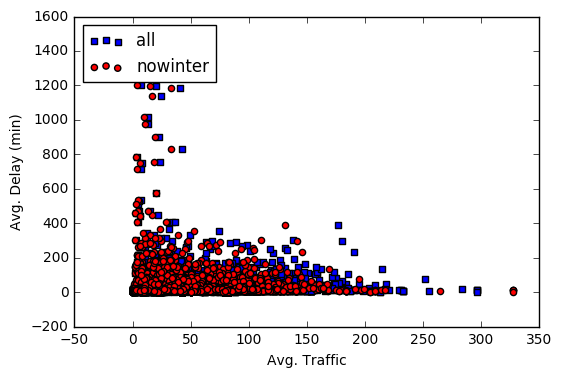

In [17]:
#plot traffic vs delay
stn_traff_delay = pd.read_csv("station_code_traff_delay.csv");

#All year

plt.scatter(stn_traff_delay['stn_delay_all'],stn_traff_delay['stn_traff'], c='b',marker='s',label='all');

#nowinter
plt.scatter(stn_traff_delay['stn_delay_nowinter'],stn_traff_delay['stn_traff'],c='r',marker='o',label='nowinter');

plt.xlabel("Avg. Traffic");
plt.ylabel("Avg. Delay (min)");

plt.legend(loc='upper left');
plt.show();

In [18]:
#correlation coefficients
corr=(pearsonr(stn_traff_delay['stn_delay_all'],stn_traff_delay['stn_traff']))[0];
print ("Correlation (Delay-Traffic): ")
print(corr);

Correlation (Delay-Traffic): 
0.0349535458917


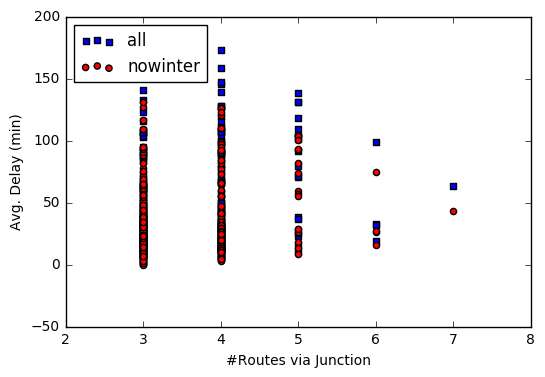

In [19]:
#plot routes vs delay
stn_delay_traff_r = pd.read_csv("station_delay_traff_routes.csv");
stn_delay_traff_r_nw = pd.read_csv("station_delay_traff_routes_nowinter.csv");

#all
plt.scatter(stn_delay_traff_r["jn_routes"],stn_delay_traff_r["jn_delay"], c='b',marker='s',label='all');

#nowinter
plt.scatter(stn_delay_traff_r_nw["jn_routes"],stn_delay_traff_r_nw["jn_delay"],c='r',marker='o',label='nowinter');

plt.xlabel("#Routes via Junction");
plt.ylabel("Avg. Delay (min)");

plt.legend(loc='upper left');
plt.show();

In [20]:
#correlation coefficients
corr=(pearsonr(stn_delay_traff_r['jn_delay'],stn_delay_traff_r['jn_routes']))[0];
print ("Correlation (Delay-Routes): ")
print(corr);

Correlation (Delay-Routes): 
0.177353096365


In [21]:
#Regression Analysis : All
df = stn_delay_traff_r;
del df["jn_code"]
scaler = MinMaxScaler();
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
res = smf.ols('jn_delay ~ jn_routes + jn_traffic',data=df_scaled).fit();
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               jn_delay   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.211
Date:                Wed, 01 Feb 2017   Prob (F-statistic):             0.0160
Time:                        04:44:15   Log-Likelihood:                 18.733
No. Observations:                 225   AIC:                            -31.47
Df Residuals:                     222   BIC:                            -21.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2347      0.022     10.589      0.000       0.191       0.278
jn_routes      0.1982      0.083      2.395      0.017       0.035       0.361
jn_traffic     0.1684      0.155      1.084      0.280      -0.138       0.475
==============================================================================
Omnibus:                       30.621   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.206
Skew:                           1.011   Prob(JB):                     3.07e-09
Kurtosis:                       3.305   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Regression Analysis : no winter
print("No Winters");
df = stn_delay_traff_r_nw;
del df["jn_code"]
scaler = MinMaxScaler();
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
res = smf.ols('jn_delay ~ jn_routes + jn_traffic',data=df_scaled).fit();
res.summary()

No Winters


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               jn_delay   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.470
Date:                Wed, 01 Feb 2017   Prob (F-statistic):             0.0328
Time:                        04:44:15   Log-Likelihood:                 3.5827
No. Observations:                 225   AIC:                            -1.165
Df Residuals:                     222   BIC:                             9.083
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2649      0.024     11.172      0.000       0.218       0.312
jn_routes      0.2101      0.089      2.374      0.018       0.036       0.385
jn_traffic     0.1003      0.166      0.604      0.547      -0.227       0.428
==============================================================================
Omnibus:                       30.471   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.463
Skew:                           1.022   Prob(JB):                     2.70e-09
Kurtosis:                       3.166   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#2-sample test
#traffic:
jn_traffic_delay = stn_delay_traff_r.ix[:,1:3];
#print jn_traffic_delay
jn_traffic_delay_sorted = jn_traffic_delay.sort(["jn_traffic"]);

jn_delay = jn_traffic_delay_sorted["jn_delay"].tolist();

jn_traffic_low = random.sample(jn_delay[1:120],60);
jn_traffic_high = random.sample(jn_delay[100:],60);

print(sum(jn_traffic_low)/50);
print(sum(jn_traffic_high)/50);

stats.ttest_ind(jn_traffic_low, jn_traffic_high, equal_var = False)

46.06825535899319
55.734008223582805


/home/subhadip/.local/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Ttest_indResult(statistic=-1.2663277974251956, pvalue=0.20795241717925808)

In [25]:
#2-sample test
#routes:
jn_traffic_delay = stn_delay_traff_r.ix[:,[0,2]];
#print jn_traffic_delay
jn_traffic_delay_sorted = jn_traffic_delay.sort(["jn_routes"]);

jn_delay = jn_traffic_delay_sorted["jn_delay"].tolist();

jn_routes_low = random.sample(jn_delay[1:120],60);
jn_routes_high = random.sample(jn_delay[100:],60);

print(sum(jn_routes_low)/50);
print(sum(jn_routes_high)/50);

#print "\n",jn_routes_low,"\n";
#print jn_routes_high;

stats.ttest_ind(jn_routes_low, jn_routes_high, equal_var = False)

51.26299996377282
66.73214534882702


/home/subhadip/.local/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Ttest_indResult(statistic=-1.8166302322797736, pvalue=0.071939130189534267)

In [29]:

import requests



from urllib.request import urlopen

def find_avg_delay(train_no):
	#train_no=53340
	#print("Looking for train number: "+str(train_no))
	
	url1 = 'http://www.irctclive.in/RunningTrainHistoryStatus/'
	url=url1+str(train_no)+'/lastyear'
	
	try:
		page = urlopen(url);

	except:
		#print ("HTTP Error: "+url);
		extreme_temp=np.zeros(7)
		for i in range(7):
			extreme_temp[i]=-1

		return extreme_temp
		
		        
	soup = BeautifulSoup(page,'html.parser')
	table = soup.find_all(class_='table datatable table-striped table-bordered')
	#print(table)
	
	date = []
	delay = []
	
	for row in table[0]('tr')[1:]:
		col=row('td')
		date.append(col[0].string)
		delay.append(col[2].string)


	dtime = []
	c=0

	for time in delay:
		if time.find('Hr') != -1:
			x=60*int(time[0:time.find('Hr')]) + int(time[time.find('Hr')+3:time.find('Min')])
			dtime.append(60*int(time[0:time.find('Hr')]) + int(time[time.find('Hr')+3:time.find('Min')]))
		elif time.find('Min') != -1:
			x=int(time[0:time.find('Min')])
			dtime.append(int(time[0:time.find('Min')]))
		else:
			x=0
			dtime.append(0)


			
	temp=np.zeros(7)	
	for i in range(len(dtime)):
		j=i%7
		temp[j]=temp[j]+dtime[i]

	temp=temp/7	
	return temp
	
df1=pd.read_csv('num_routes.csv',header=None);
jn_name = df1[1].tolist()
jn_route=df1[0].tolist()
#print(jn_name)

df2 = pd.read_csv('station_details.csv',header=None);
st_name = df2[1].tolist()
st_code=df2[0].tolist()



jn_code=[]
new_jn_name=[]
new_jn_route=[]
for j in range(len(jn_name)):
	for i in range(len(st_name)):
		if st_name[i]==jn_name[j]:
			new_jn_name.append(jn_name[j])
			new_jn_route.append(jn_route[j])
			jn_code.append(st_code[i])

df3 = pd.read_csv('trains_list.csv',header=None);
train_no = df3[1].tolist()
jn_code_for_train =df3[0].tolist()


final_jn_code=[]
#x=input()
final_jn_delay=[]
final_jn_traffic=[]
final_jn_route=[]
final_jn_name=[]
extreme_temp=np.zeros(7)
for i in range(7):
	extreme_temp[i]=-1

for j  in range(len(jn_code)):
	temp=np.zeros(7)
	temp1=np.zeros(7)
	#print(temp)
	#x=input()
	cnt1=0
	special_train_no=[]
	for i in range(len(jn_code_for_train)):
		if jn_code_for_train[i]==jn_code[j]:
			#temp=temp+find_avg_delay(train_no[i])
			#x=input()
			special_train_no.append(train_no[i])
			cnt1=cnt1+1
	cnt2=0	
	for i in range(min(len(special_train_no),1)):# may vary this for changing no. of trains to be sampled per junction
		temp1=find_avg_delay(special_train_no[i])
		if (temp1==extreme_temp).all():
			continue
		#print(temp1[4])
		#print(temp1)
		#x=input()
		for k in range(7):
			temp[k]=temp[k]+temp1[k]
			#temp=temp+find_avg_delay(special_train_no[i])
		
		cnt2=cnt2+1


	#print(temp)		
	#x=input()
	if(cnt2!=0):

		final_jn_code.append(jn_code[j])
		final_jn_delay.append(temp/cnt2)
		final_jn_traffic.append(cnt1)
		final_jn_route.append(new_jn_route[j])
		final_jn_name.append(new_jn_name[j])


'''
print(final_jn_name)
print(final_jn_delay)
print(final_jn_route)
print(final_jn_traffic)
print(len(final_jn_traffic))
print(len(final_jn_route))
print(len(final_jn_delay))
'''
fri=[]
sat=[]
sun=[]
mon=[]
tues=[]
wed=[]
thurs=[]
for d in final_jn_delay:
	fri.append(d[0])
	sat.append(d[1])
	sun.append(d[2])
	mon.append(d[3])
	tues.append(d[4])
	wed.append(d[5])
	thurs.append(d[6])

#train_no_col = list(map(int, train_no_col))
print("A set of 91 junctions were sampled for this experiment:")
print("comparison between Fridays and Mondays")
print(stats.ttest_ind(a= fri,b= mon,equal_var=True))
print("comparison between Sundays and Mondays")
print(stats.ttest_ind(a= sun,b= mon,equal_var=True))
print("comparison between Saturdays and Mondays")
print(stats.ttest_ind(a= sat,b= mon,equal_var=True))

comparison between Fridays and Mondays
Ttest_indResult(statistic=0.0043388578879379148, pvalue=0.99654350816451298)
comparison between Sundays and Mondays
Ttest_indResult(statistic=0.34851512060567386, pvalue=0.72791151793991071)
comparison between Saturdays and Mondays
Ttest_indResult(statistic=-0.12737132992564812, pvalue=0.89880644501734197)


In [34]:
from urllib.request import urlopen

df = pd.read_csv('BathindaCoochbehar.csv',header=None);
train_no_col = df[0].astype(int).tolist()
#print(train_no_col)
train_no_col = list(map(int, train_no_col))

fdtime=np.zeros(365); #array that stores average delay over all trains through a junction per day
#print(len(train_no_col))
i=0
count=0
for train_no in train_no_col:
		#print("Looking for train number: "+str(train_no))
		url1 = 'http://www.irctclive.in/RunningTrainHistoryStatus/'
		url=url1+str(train_no)+'/lastyear'
		#try:
		#	page = requests.get(url)

		try:
			page = urlopen(url);

		except:
			#print ("HTTP Error: "+url);
			continue
		
		        
		soup = BeautifulSoup(page,'html.parser')
		table = soup.find_all(class_='table datatable table-striped table-bordered')
	    #print(len(table[0]))
		date = []
		delay = []
	
		for row in table[0]('tr')[1:]:
			col=row('td')
			date.append(col[0].string)
			delay.append(col[2].string)


		dtime = []
		c=0

		for time in delay:
			if time.find('Hr') != -1:
				x=60*int(time[0:time.find('Hr')]) + int(time[time.find('Hr')+3:time.find('Min')])
				dtime.append(60*int(time[0:time.find('Hr')]) + int(time[time.find('Hr')+3:time.find('Min')]))
			elif time.find('Min') != -1:
				x=int(time[0:time.find('Min')])
				dtime.append(int(time[0:time.find('Min')]))
			else:
				x=0
				dtime.append(0)
			fdtime[c]=fdtime[c]+x
			c=c+1
		#if i==0 or i==1 :
		#	print(fdtime)
		i=i+1
		count=count+1

#print(fdtime)

#print(count)
#fdtime=fdtime/len(train_no_col)
fdtime=fdtime/count
#print(fdtime)

#fdtime contains avg delay over all trains for each day(365 long array)	



df = pd.read_csv('BathindaCoochbehar.csv',header=None);
train_no_col = df[1].astype(int).tolist()
#print(train_no_col)
train_no_col = list(map(int, train_no_col))

fdtime1=np.zeros(365); #array that stores average delay over all trains through a junction per day
#print(len(train_no_col))
i=0
count=0
for train_no in train_no_col:
		#print("Looking for train number: "+str(train_no))
		url1 = 'http://www.irctclive.in/RunningTrainHistoryStatus/'
		url=url1+str(train_no)+'/lastyear'

		try:
			page = urlopen(url);

		except:
			#print ("HTTP Error: "+url);
			continue
		
		        
		soup = BeautifulSoup(page,'html.parser')
		table = soup.find_all(class_='table datatable table-striped table-bordered')
	    #print(len(table[0]))
		date = []
		delay = []
	
		for row in table[0]('tr')[1:]:
			col=row('td')
			date.append(col[0].string)
			delay.append(col[2].string)


		dtime = []
		c=0

		for time in delay:
			if time.find('Hr') != -1:
				x=60*int(time[0:time.find('Hr')]) + int(time[time.find('Hr')+3:time.find('Min')])
				dtime.append(60*int(time[0:time.find('Hr')]) + int(time[time.find('Hr')+3:time.find('Min')]))
			elif time.find('Min') != -1:
				x=int(time[0:time.find('Min')])
				dtime.append(int(time[0:time.find('Min')]))
			else:
				x=0
				dtime.append(0)
			fdtime1[c]=fdtime1[c]+x
			c=c+1
		#if i==0 or i==1 :
		#	print(fdtime)
		i=i+1
		count=count+1


fdtime1=fdtime1/count

print("Comparison between delays at Bathinda and CoochBehar junctions")
#fdtime contains avg delay over all trains for each day(365 long array)	
print(stats.ttest_ind(a= fdtime,b= fdtime1,equal_var=True))
#we checked that the variance ratio of the samples is between 0.5 and 2

#we get a p-value of 0.045 ant tstat as .0035
#that means prob of observing such samples given two populations 
#are same is less than 5%
#We have to reject null hypo with confidence 95%  

Comparison between delays at Bathinda and CoochBehar junctions
Ttest_indResult(statistic=2.0035577086271767, pvalue=0.045487595690459445)
